## Data Ingestion


In [70]:
# Importing all the necessary libraries
from turtle import bye
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import warnings
from sklearn.preprocessing import MinMaxScaler
from zipfile import ZipFile 
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree  import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

 

Premilary Data Analysis

In [71]:
# Loading of File
path= r"C:\Users\User\Desktop\assignment\My_Task\Week_11\wine+quality.zip"


In [72]:
def Load_Path(path):
    with ZipFile(path, 'r') as ref_zip:
        ref_zip.printdir()


In [73]:
Load_Path(path)

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [74]:
with ZipFile(path) as z:
    with z.open("winequality-white.csv") as f:
        wine=pd.read_csv(f, sep=";")

In [75]:
df=wine
df.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [76]:
# checking out for the shape in the dataset
df.shape

(4898, 12)

In [77]:
# Checking out for missing values in the dataset
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [78]:
df.duplicated().sum()

np.int64(937)

In [79]:
# Verifying datatype and correct them if needed
df.dtypes
df['quality']=df['quality'].astype('float')
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

# Summary of all data cleaning action
1. I loaded the dataset given above
2. I display the first six rows of the dataset
3. I check out for missing values. This dataset does not have a missing value, therefore no data cleaning is done here.
4. There is no duplicate in this dataset
5. I corrected quality column from (int to float)

# Exploratory Data Analysis (EDA) and Scaling

In [80]:
numerical_features= df.select_dtypes(include='number').columns
def histogram_boxplot(df, feature, figsize=(15, 10), kde=False, bins=None):
    ""
 # For histogra
 #  # Add median to the histogram
    for col in numerical_features:
        plt.figure(figsize=(12,8))
        sns.histplot(df[col], bins=30, kde=True, color='teal')
        plt.title(f'Histogram of {col} skewness: {df[col].skew()}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()




    

    

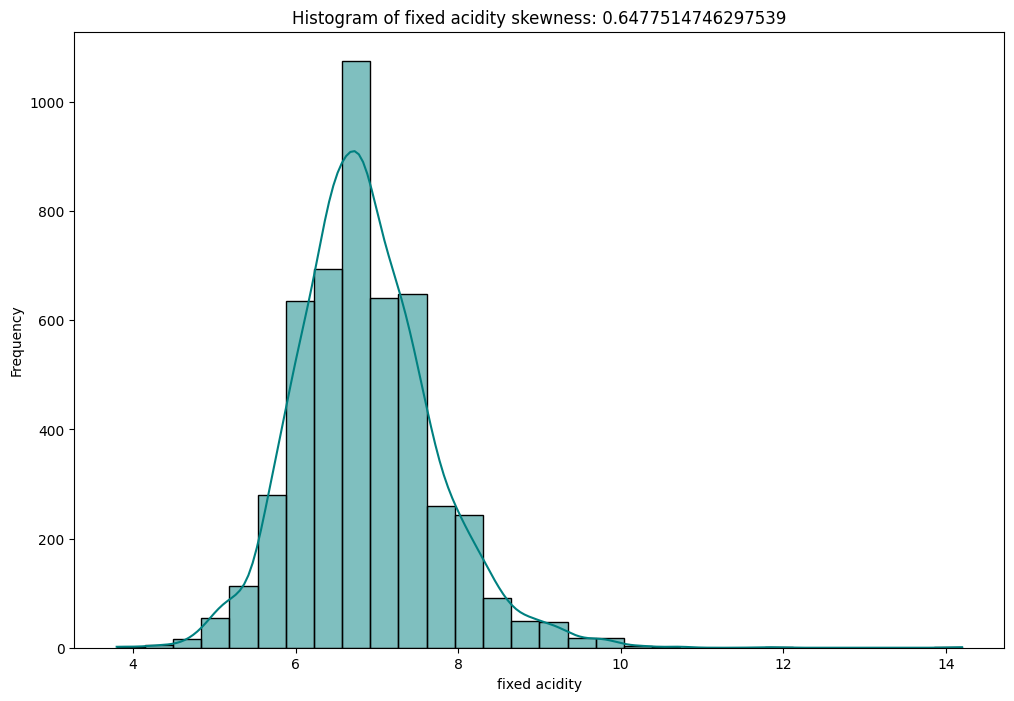

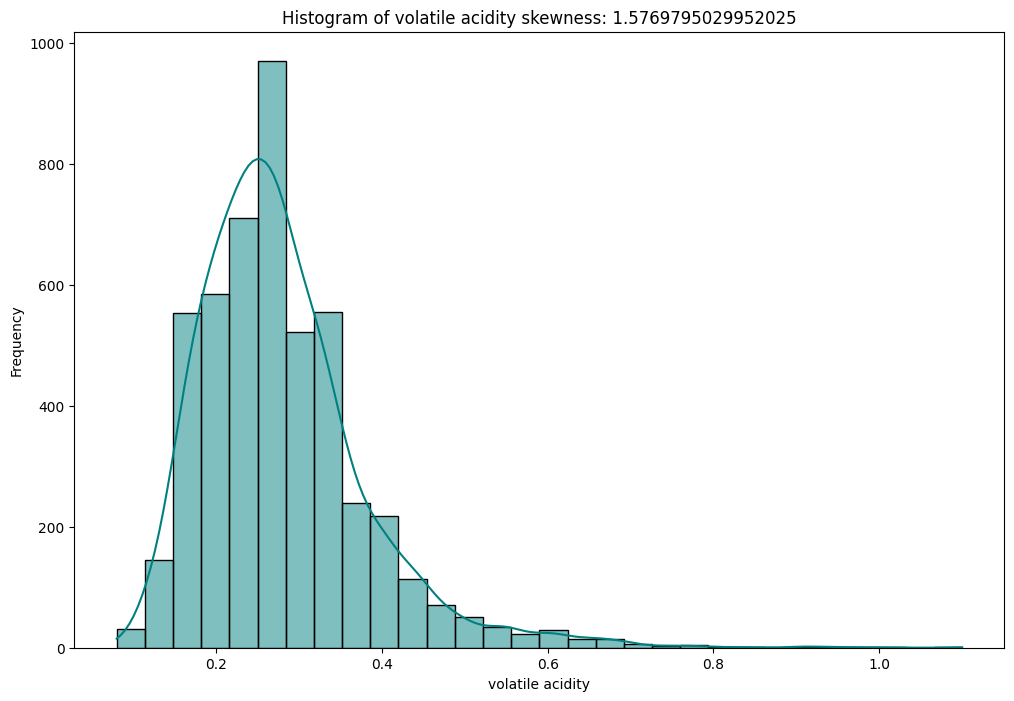

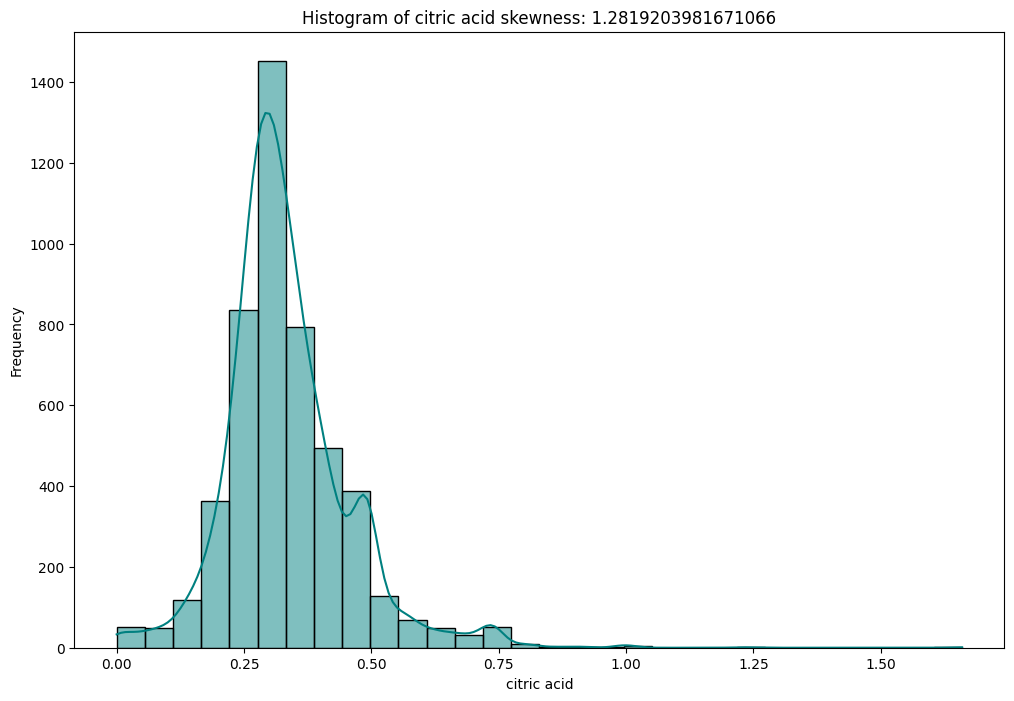

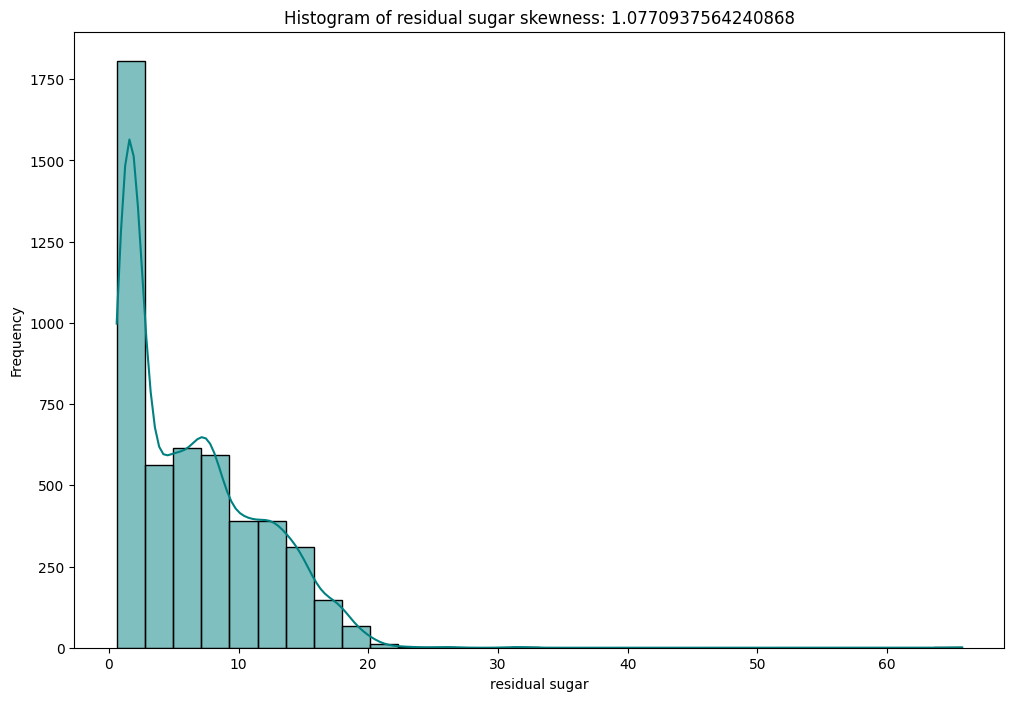

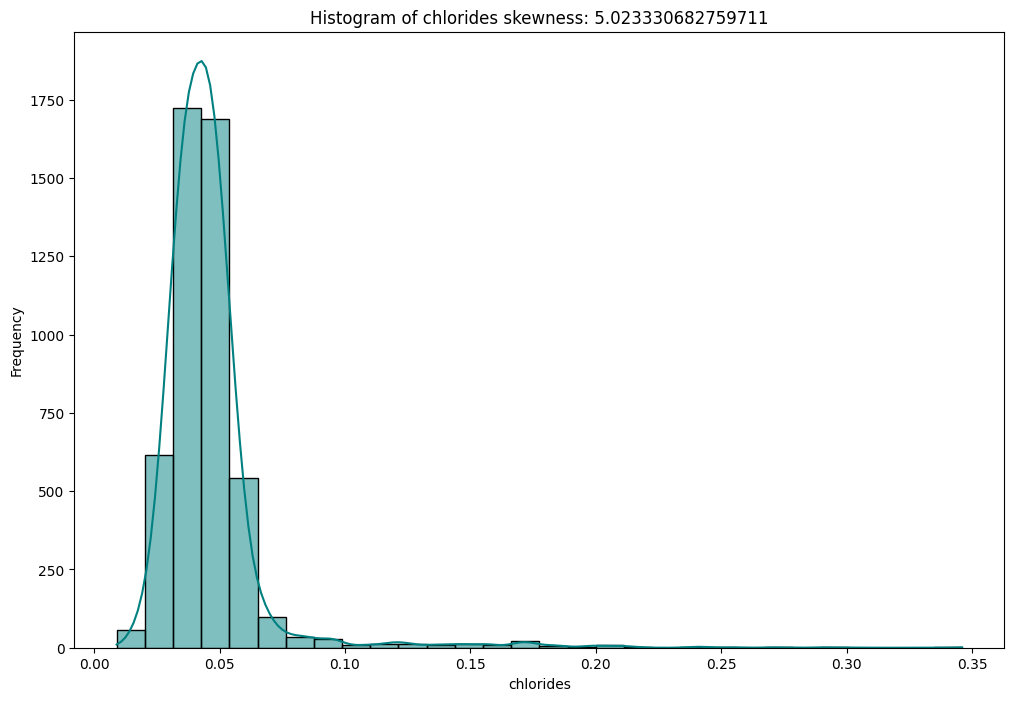

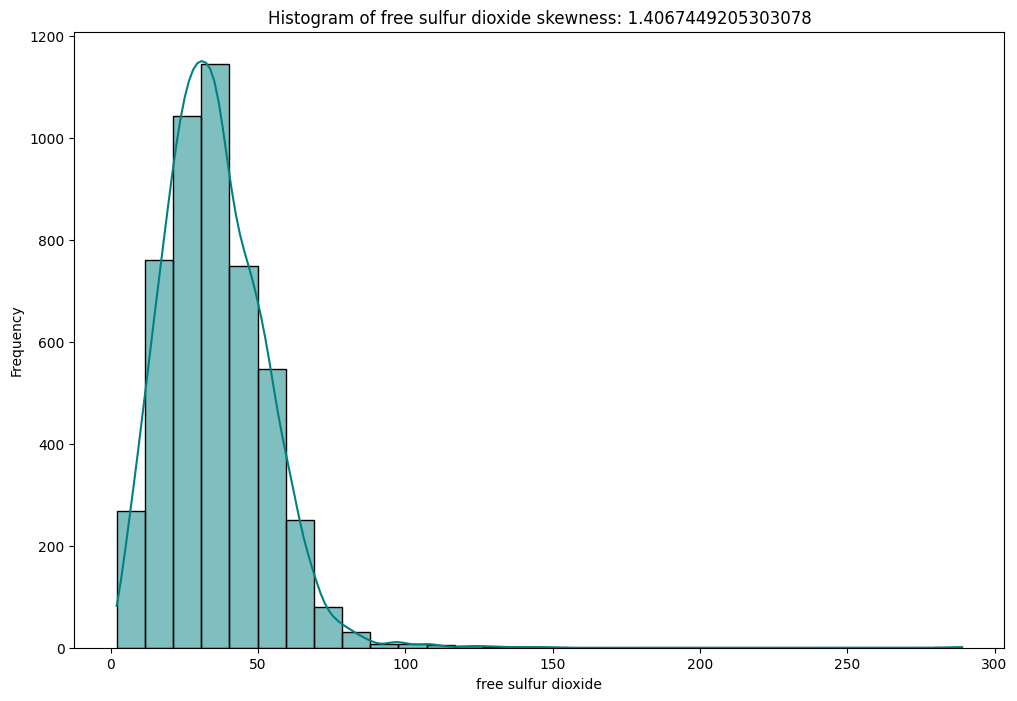

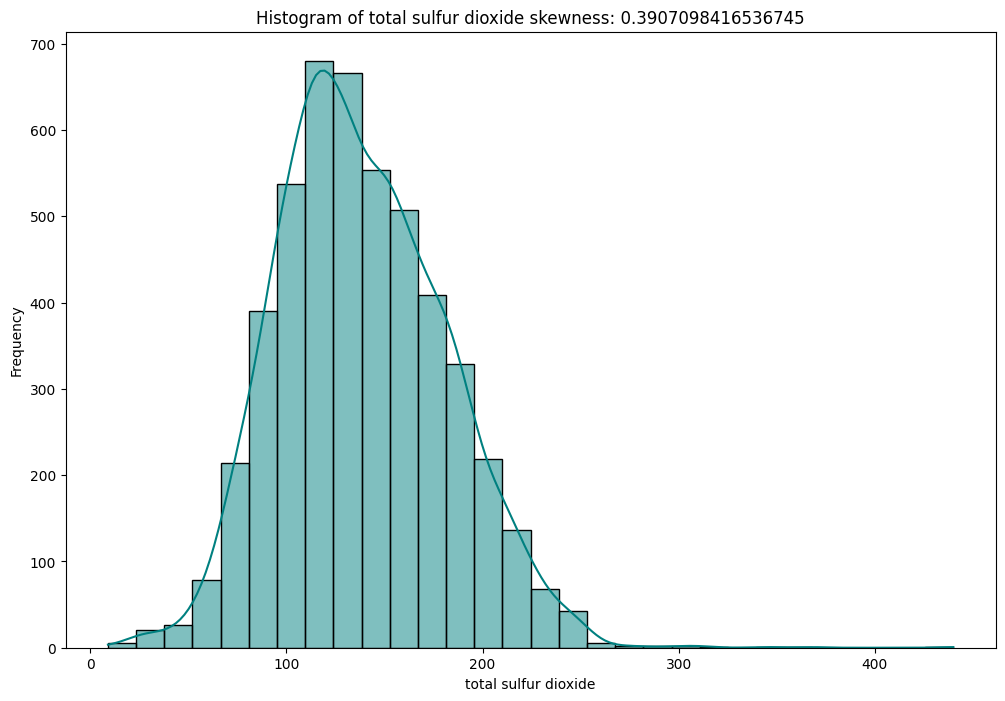

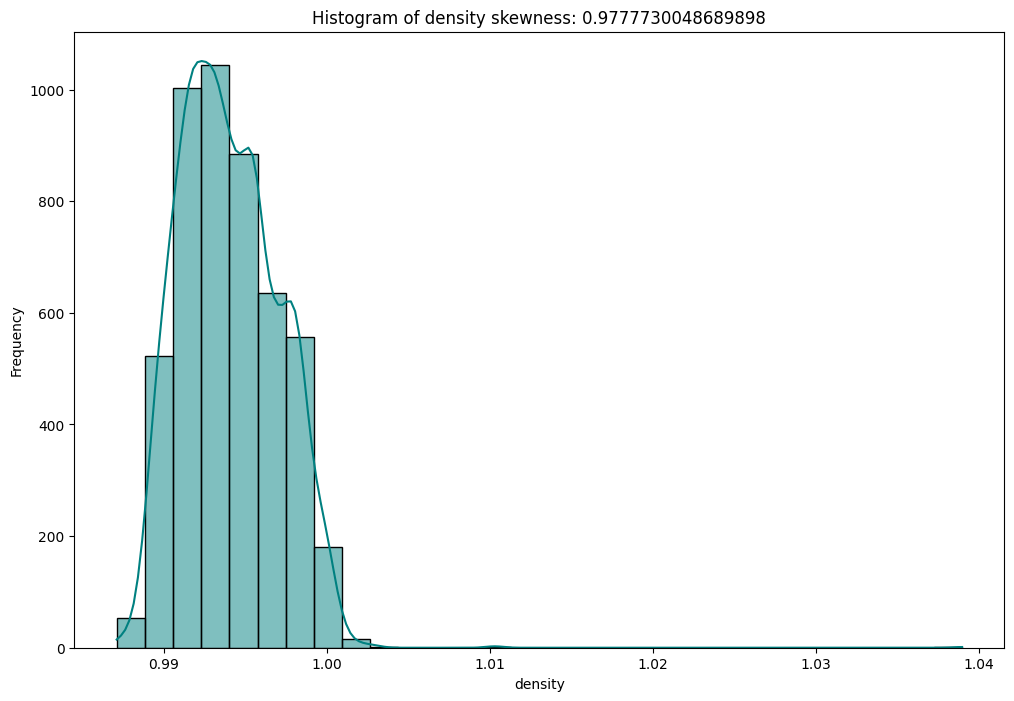

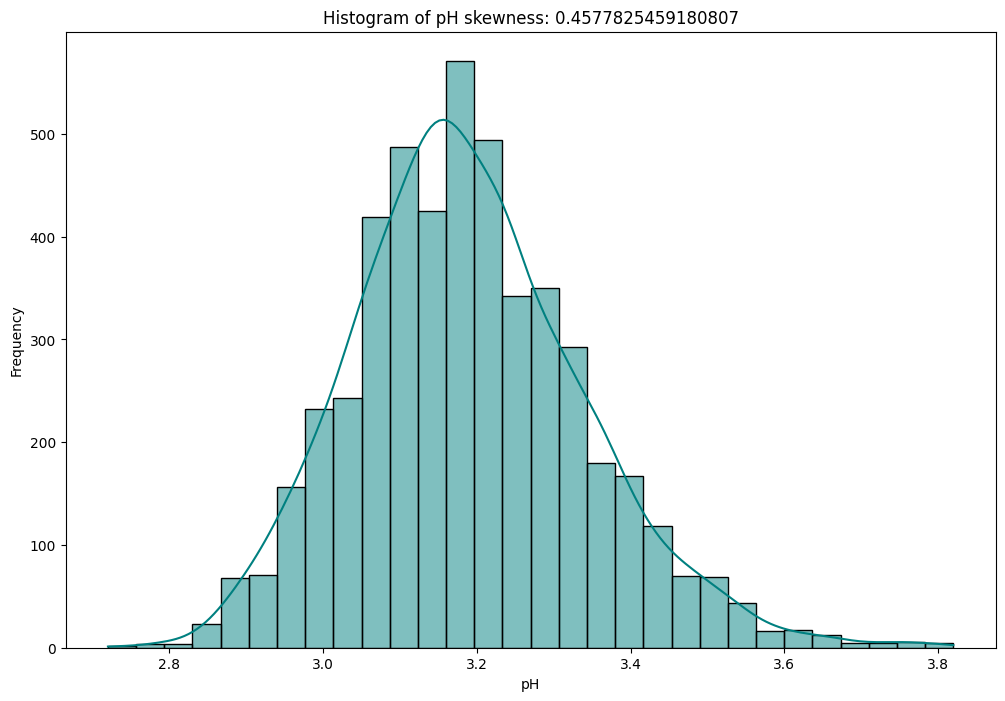

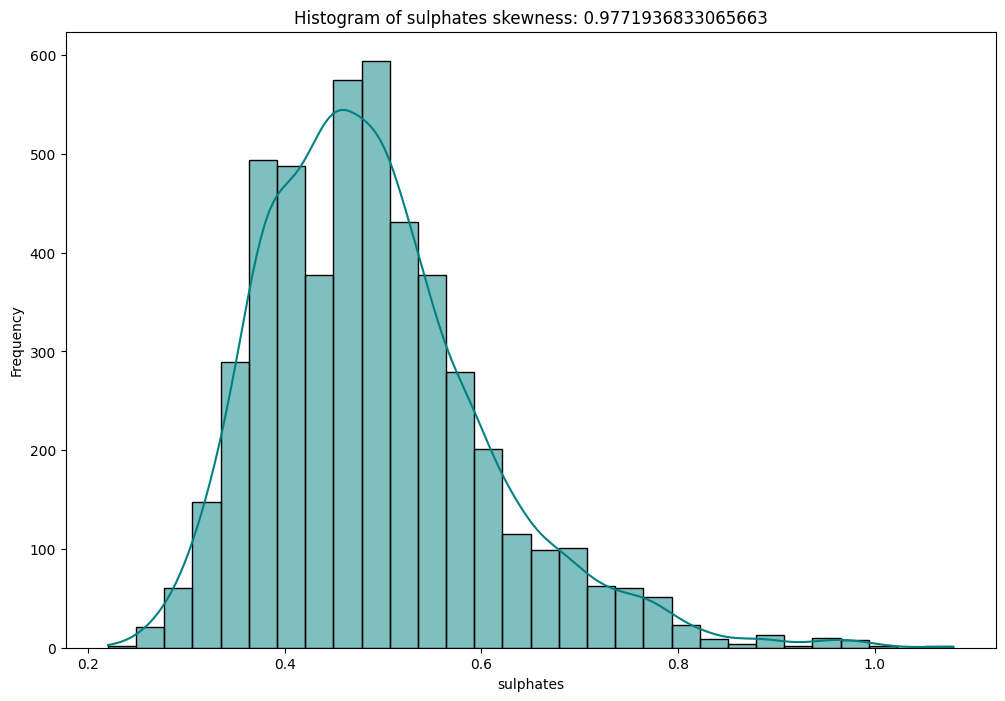

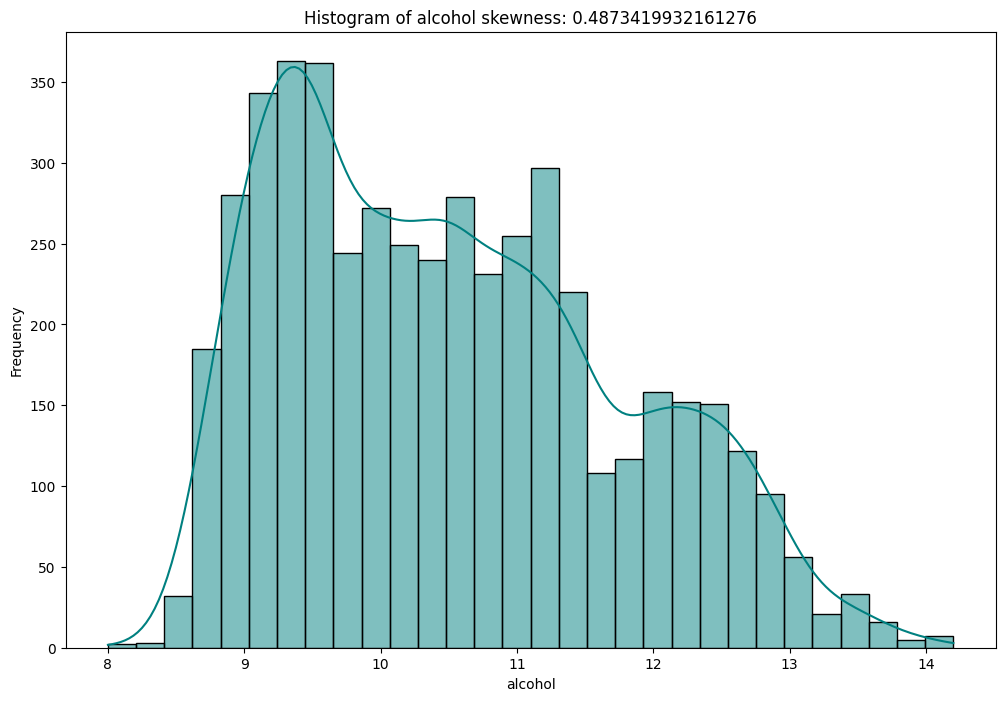

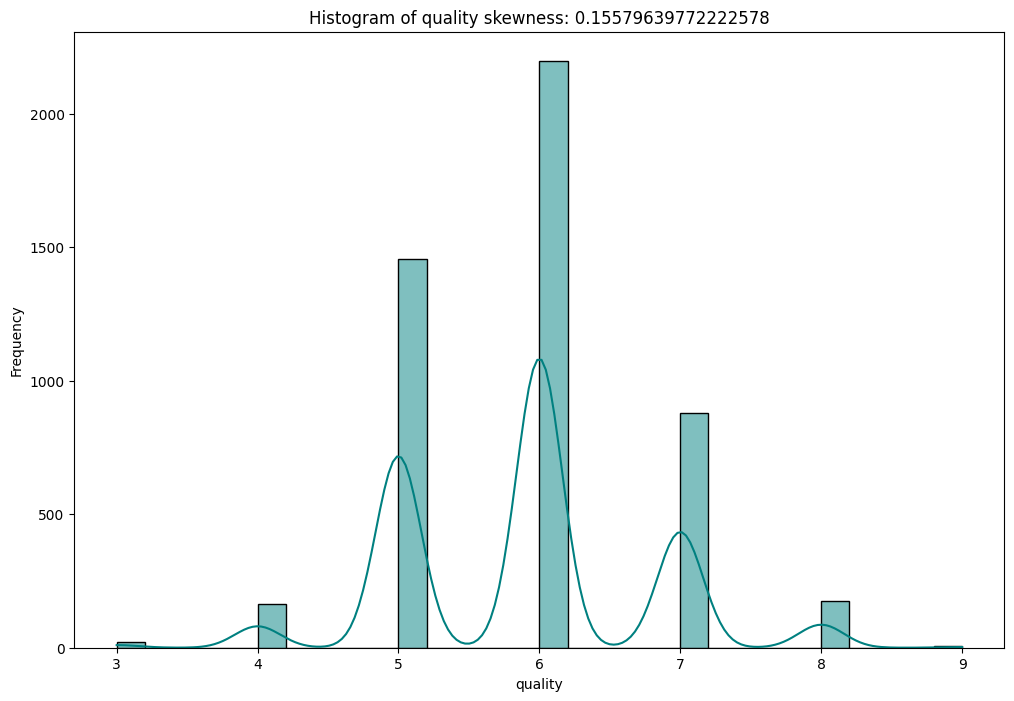

In [81]:
histogram_boxplot(df, 'quality', kde=True, bins=30)

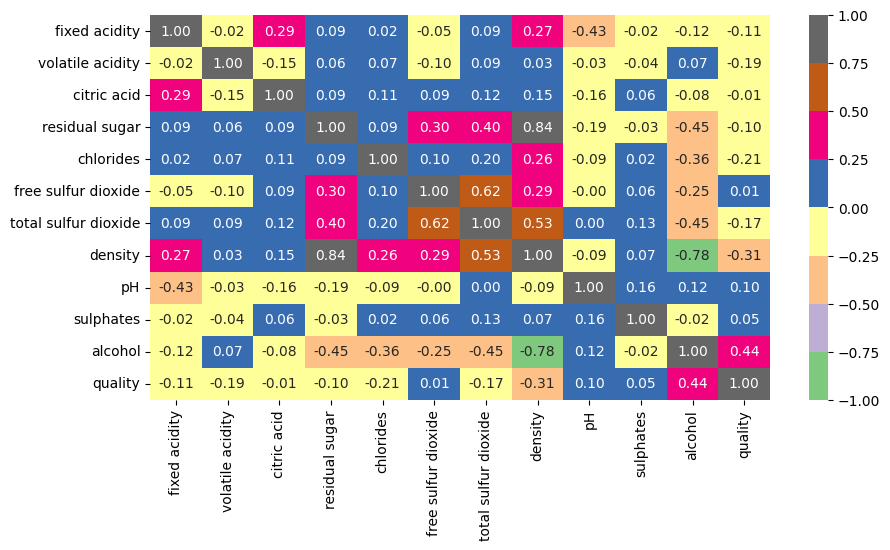

In [82]:
# 3. Examine the correlation of each feature with the target variable (quality)

cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Accent"
)
plt.show()

In [83]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


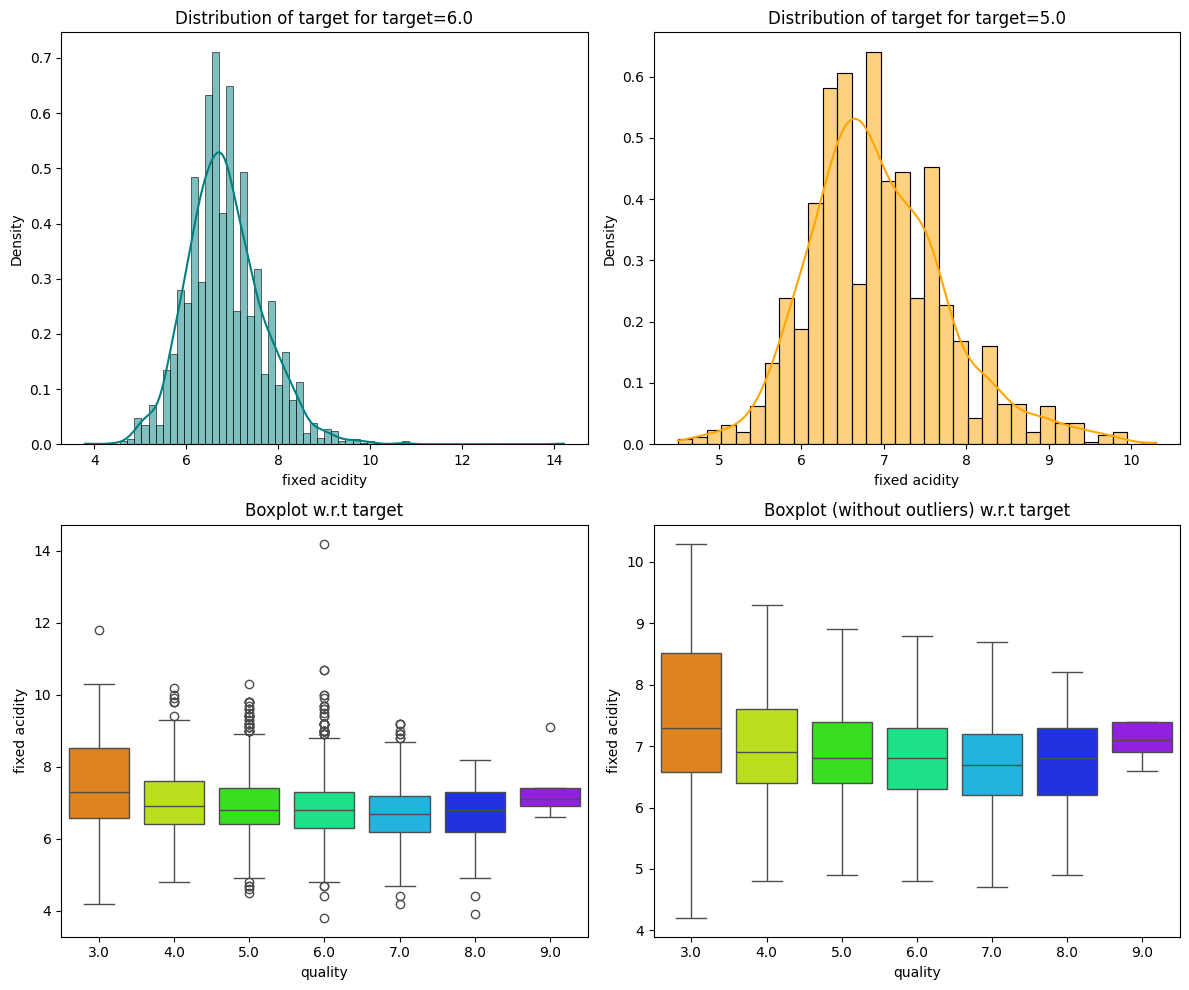

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


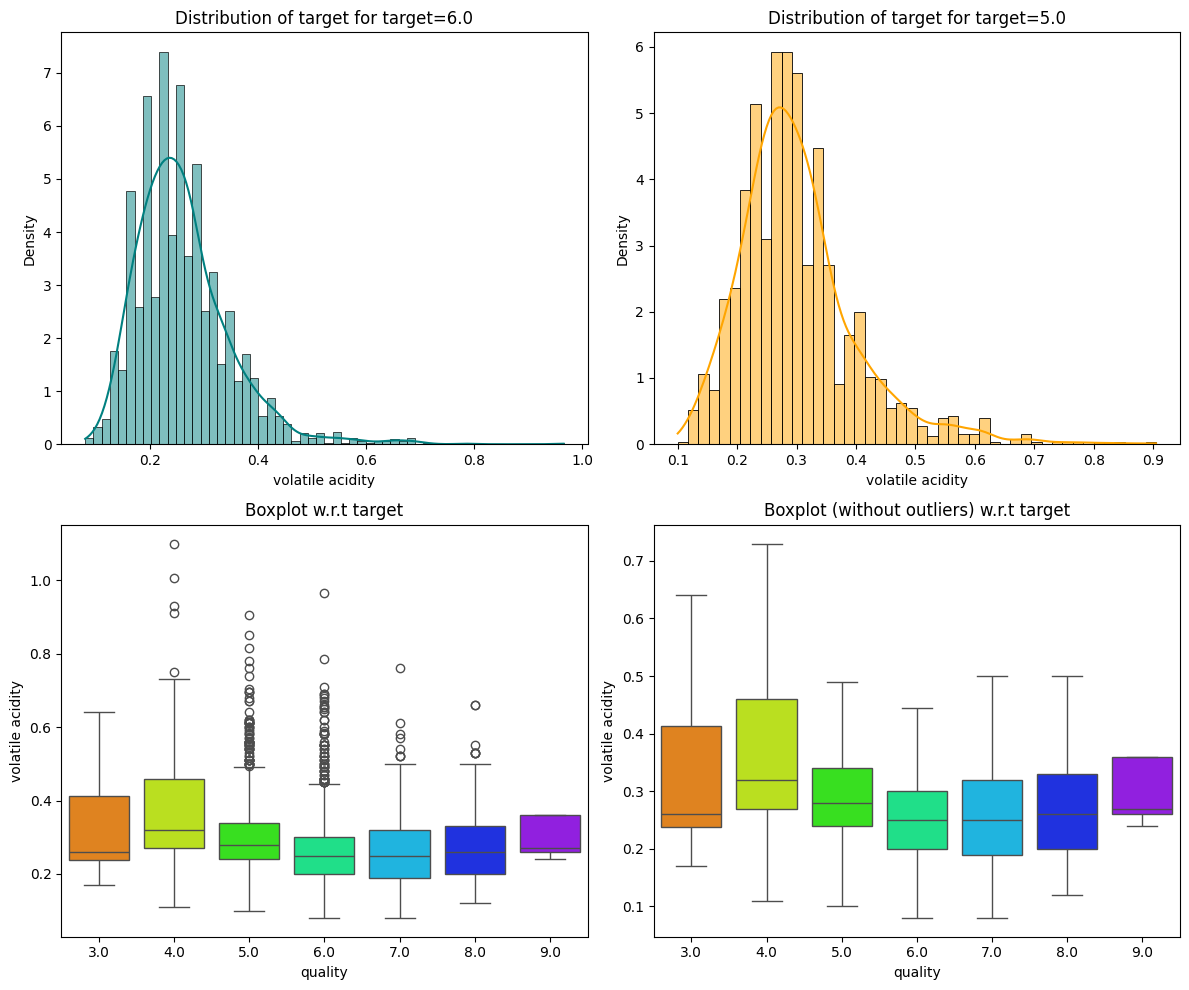

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


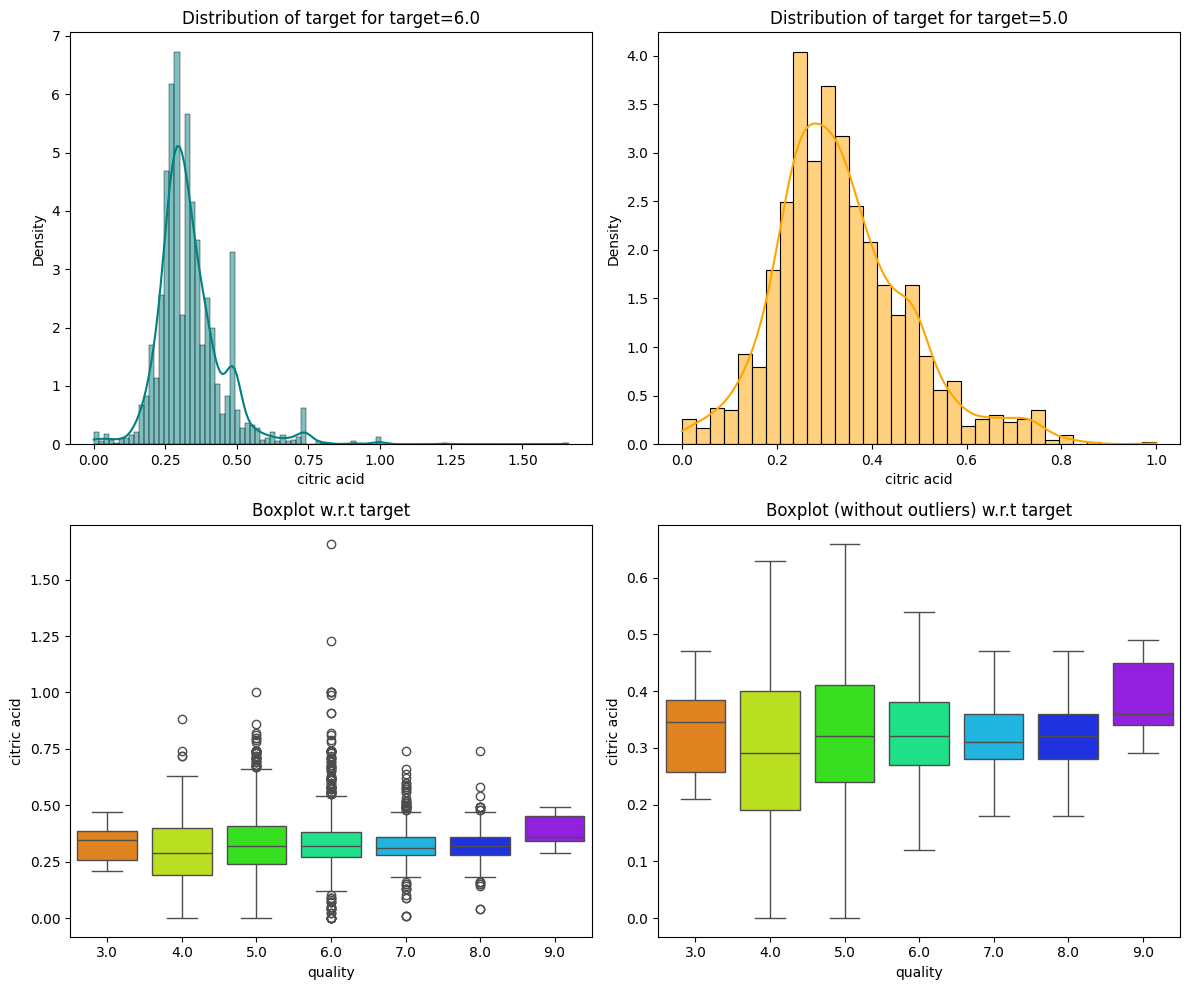

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


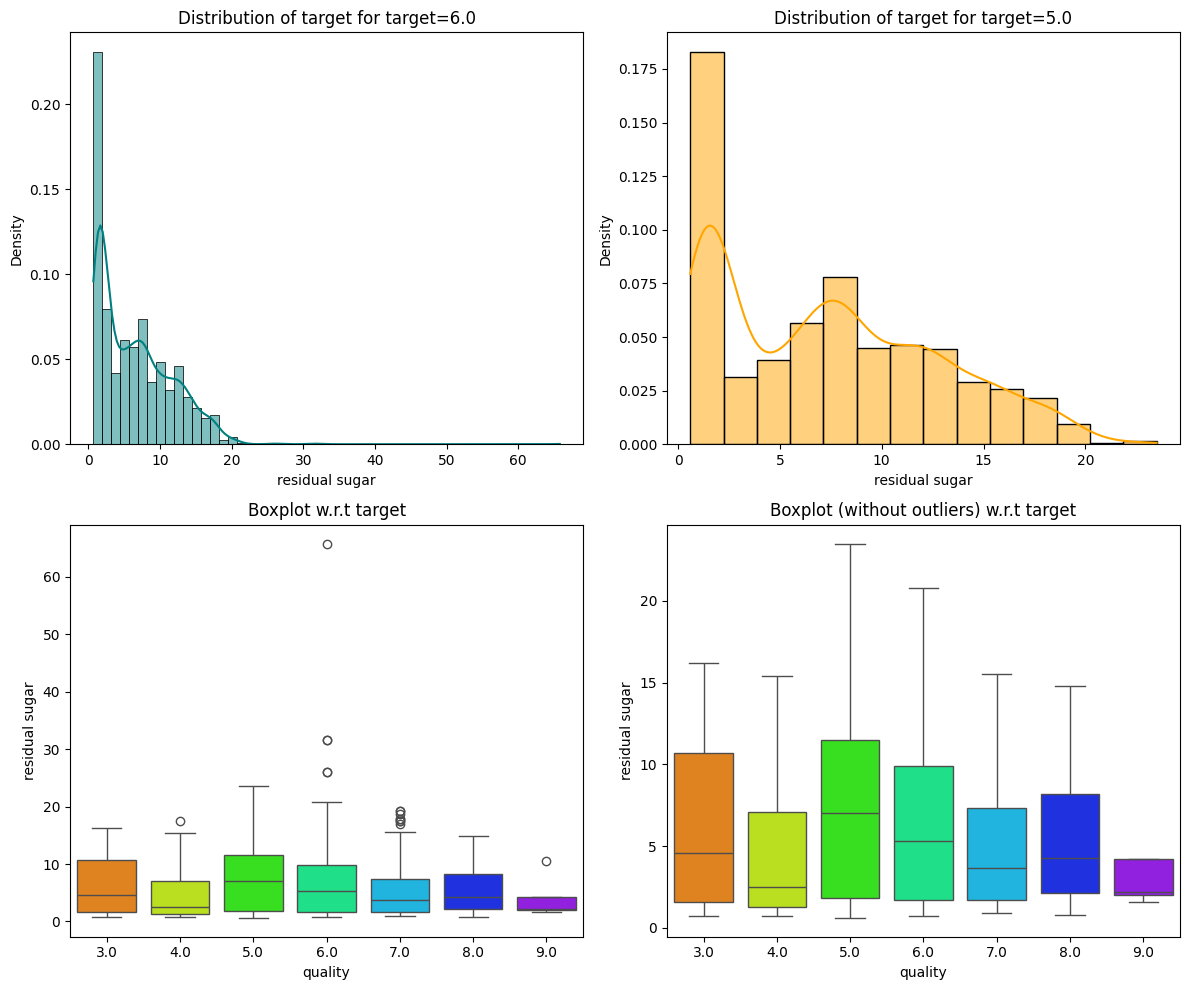

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


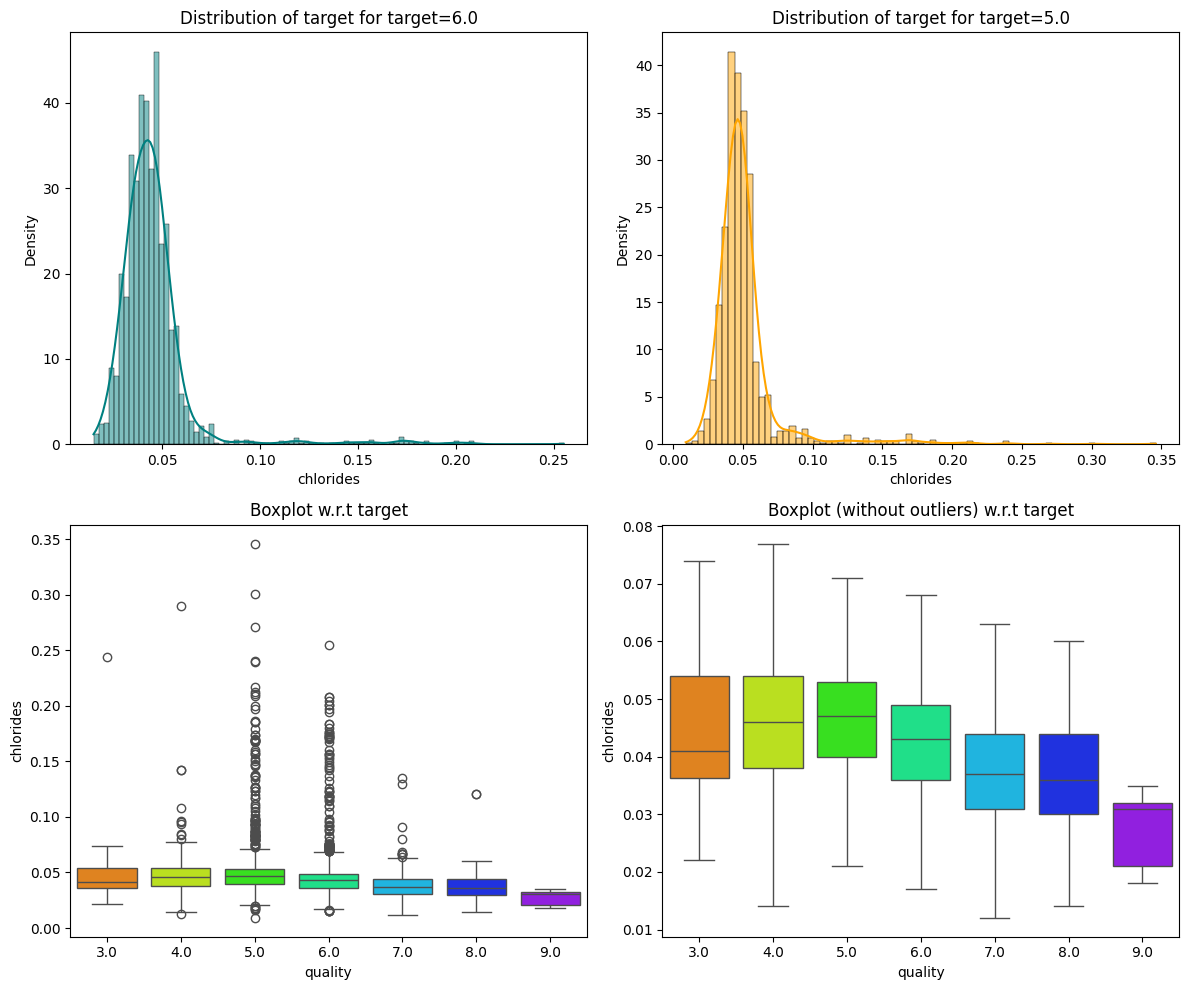

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


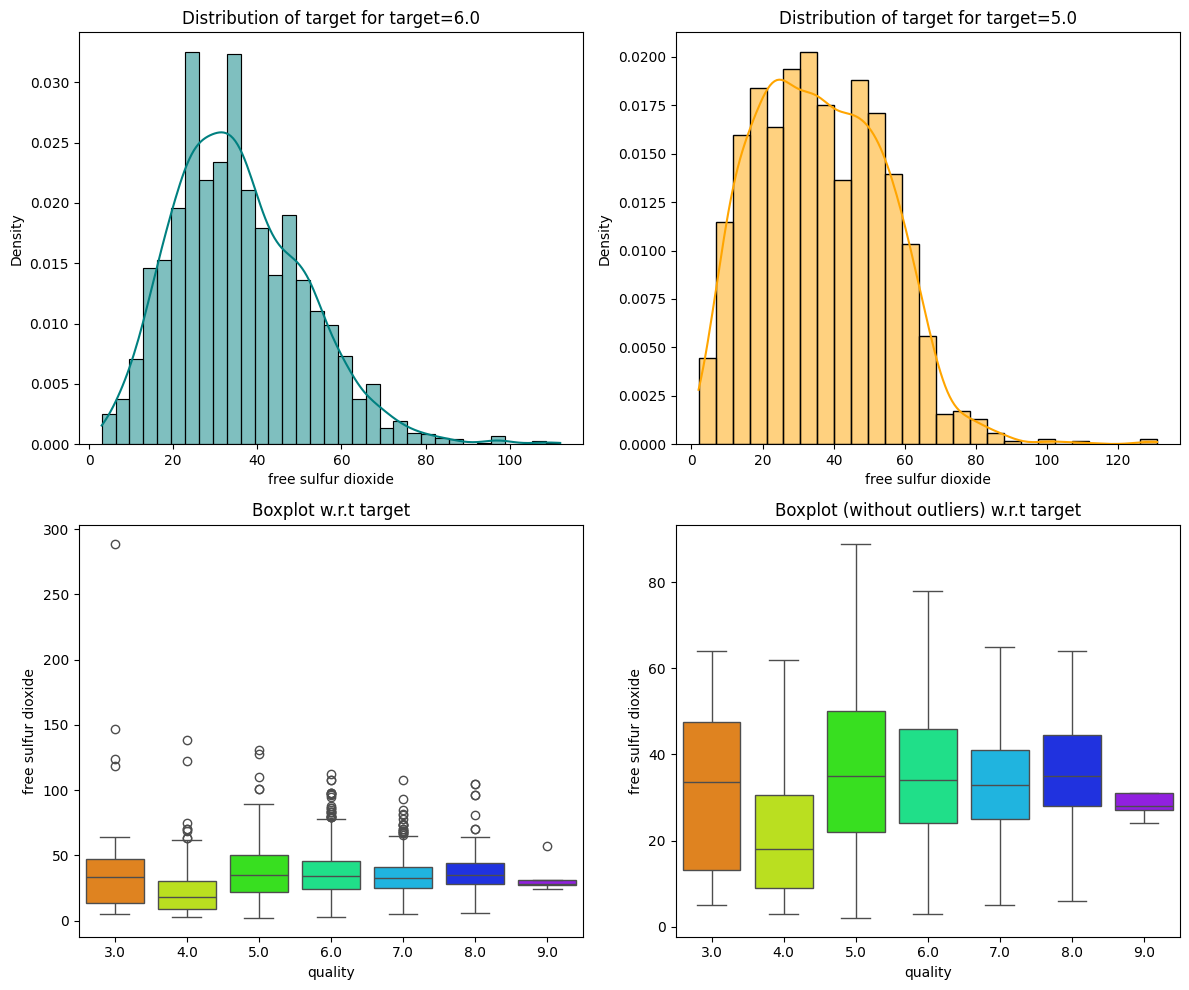

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


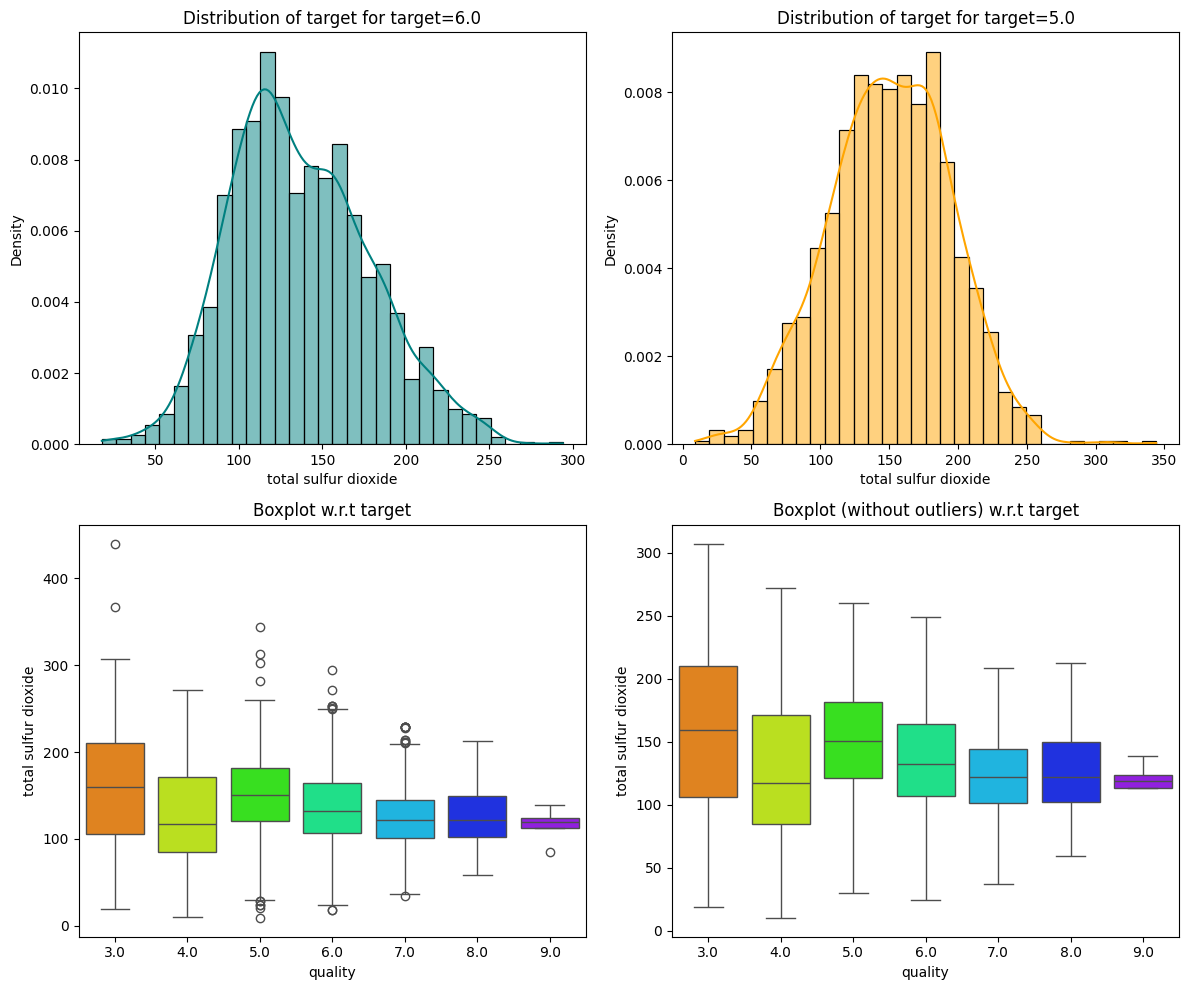

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


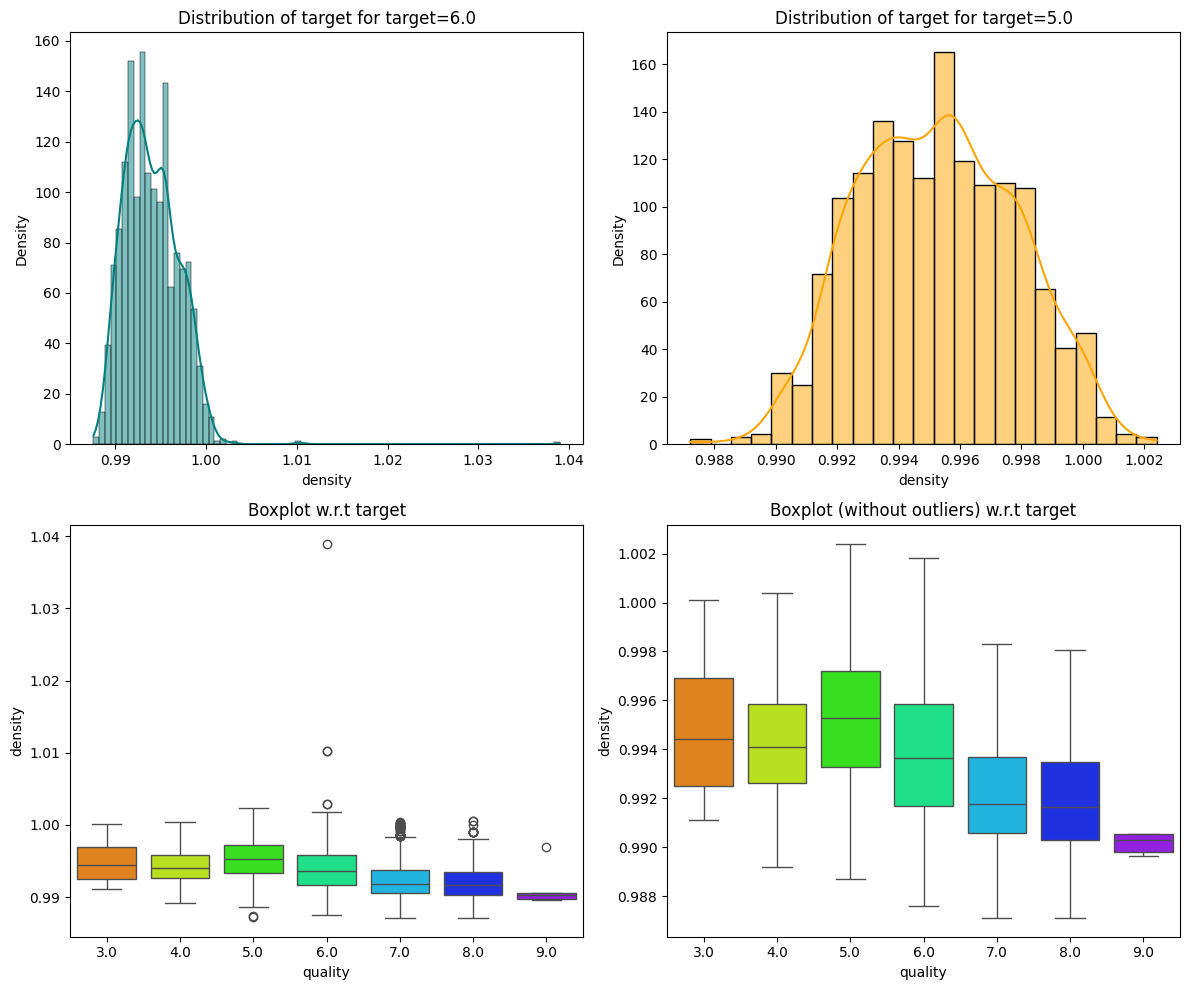

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


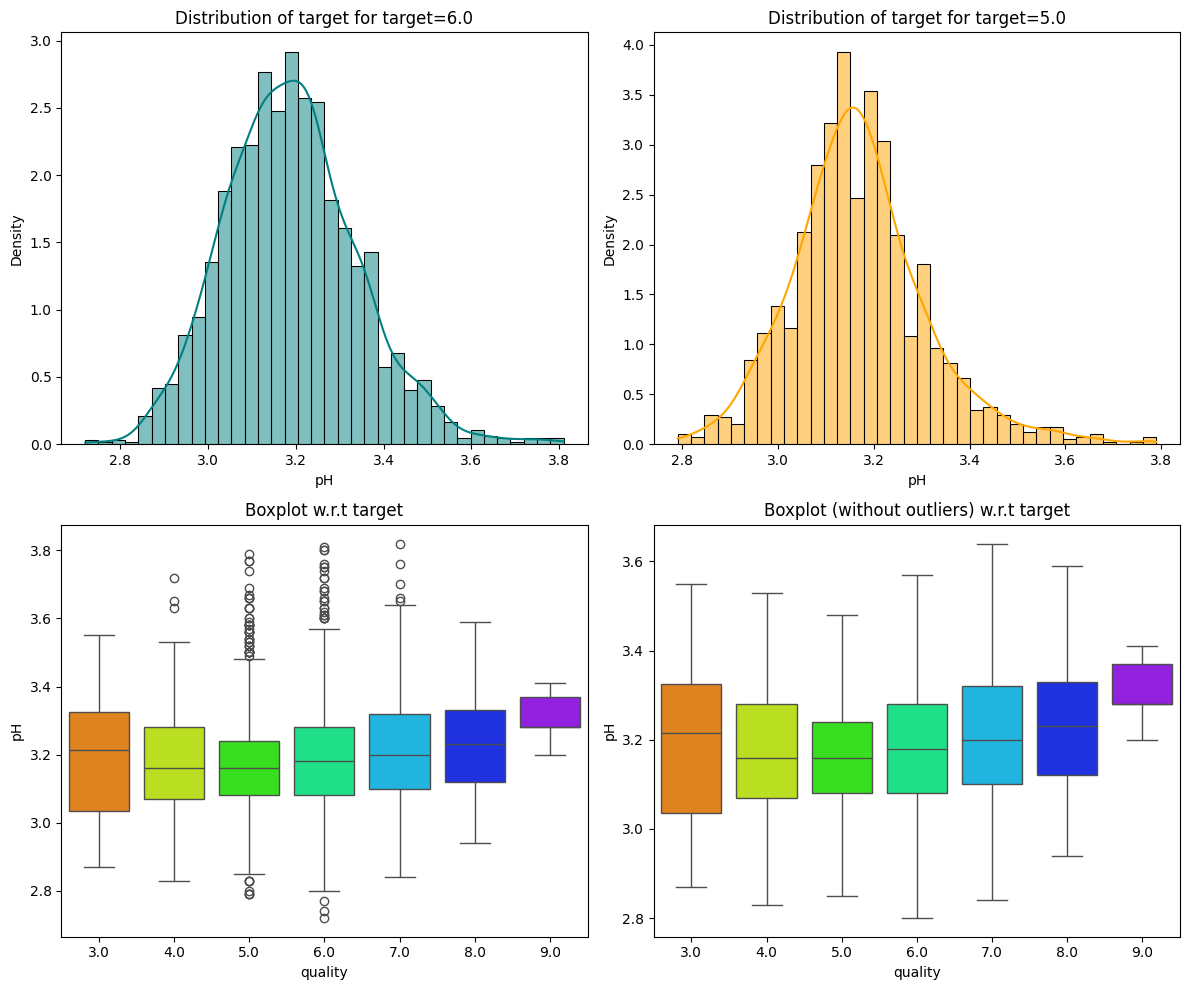

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


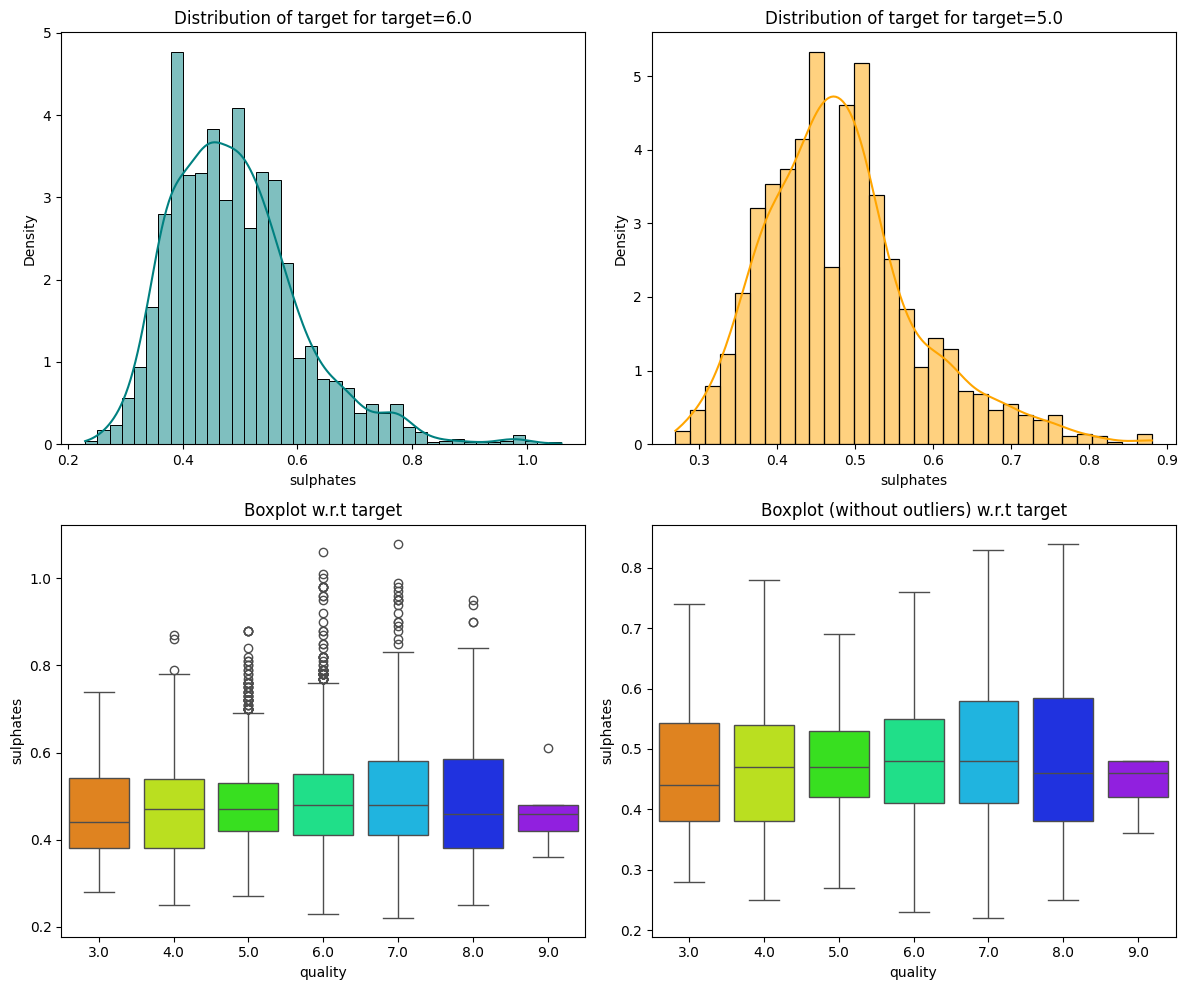

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


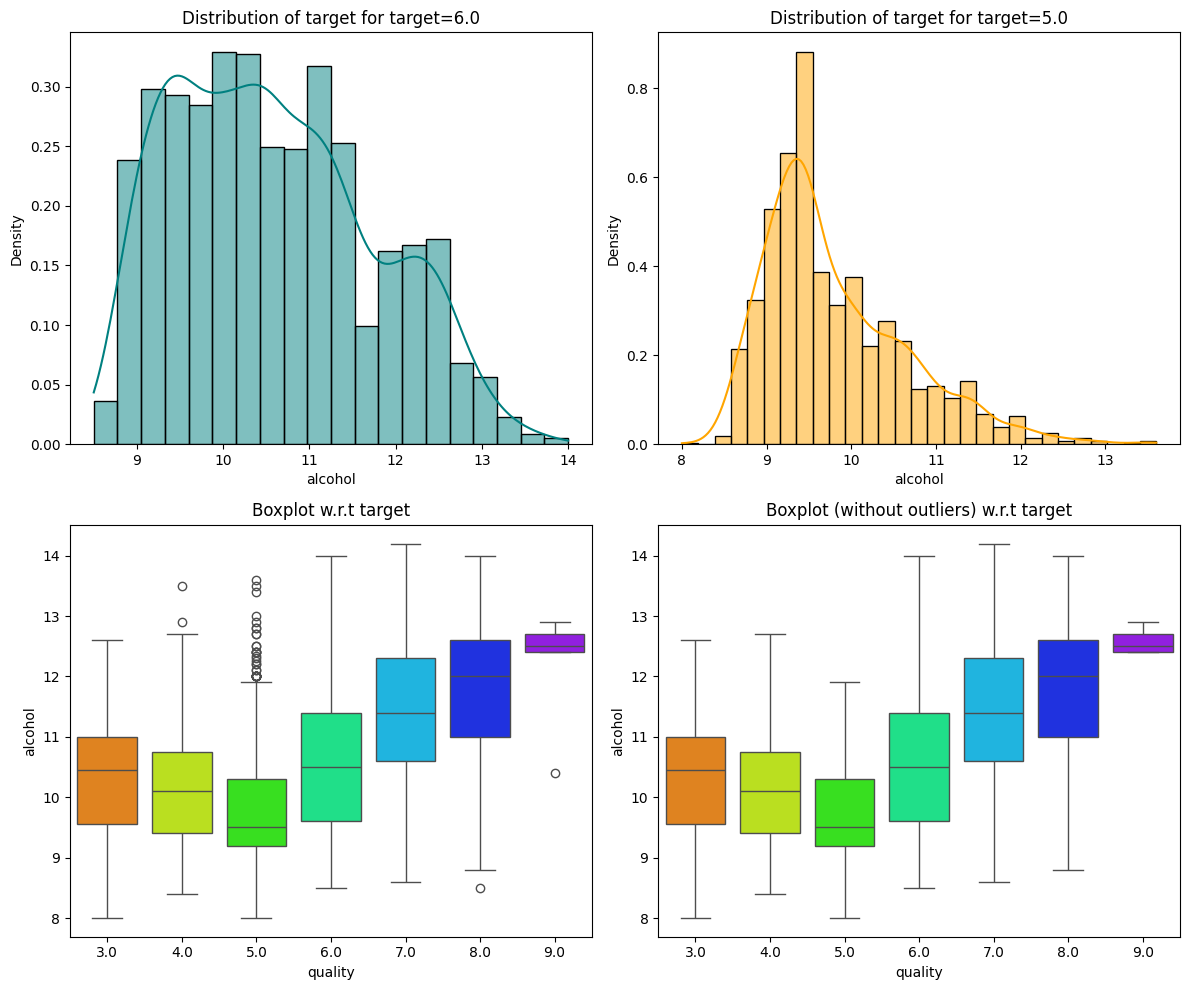

C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\User\AppData\Local\Temp\ipykernel_4552\2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


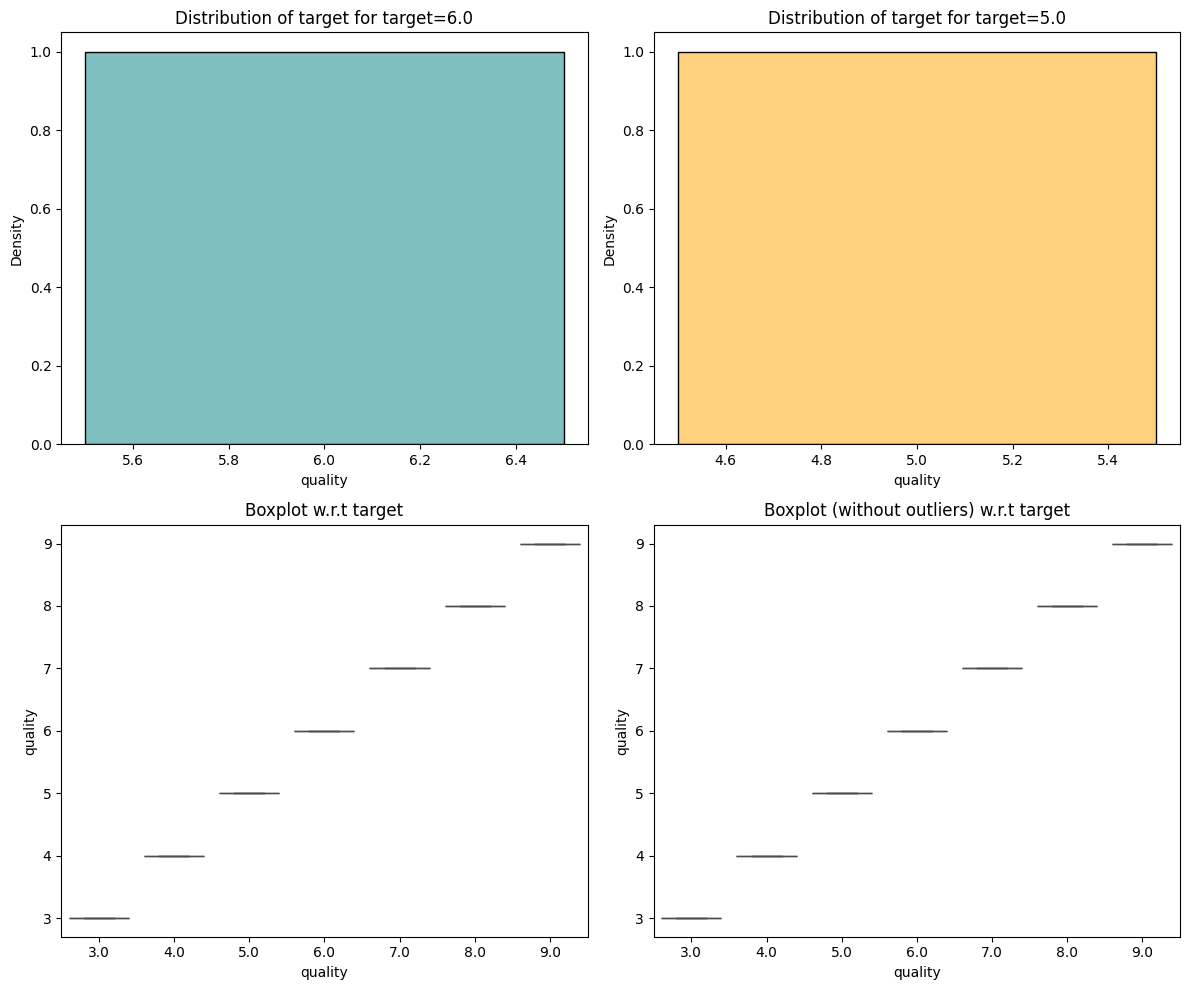

In [84]:
for feature in numerical_features:
    distribution_plot_wrt_target(df, feature,   "quality")

In [85]:
# Map the quality column  into categorical classes as follows
df["quality"]= df["quality"].replace({9: "Best", 8: "Best", 7: "Good", 6: "Good", 5: "Average", 4: "Bad", 3:"Bad"})

In [86]:
df.quality.unique()

array(['Good', 'Average', 'Best', 'Bad'], dtype=object)

In [87]:

# Split the dataset into features x and y,
from sklearn.model_selection import train_test_split


X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=234)

In [88]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3918, 11)
Shape of test set :  (980, 11)
Percentage of classes in training set:
quality
Good       0.628382
Average    0.297601
Bad        0.037264
Best       0.036753
Name: proportion, dtype: float64
Percentage of classes in test set:
quality
Good       0.628571
Average    0.296939
Bad        0.037755
Best       0.036735
Name: proportion, dtype: float64


In [89]:
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

c:\Users\User\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
# Evaluate the model Accuracy, precision Recall, F1-score and a Confusion Matrix.
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
x = df.drop(columns='quality')
y = df.quality

In [91]:
scaler= MinMaxScaler(feature_range=(0,1))
x_scaled= scaler.fit_transform(x)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=234)

Training LogisticRegression...
LogisticRegression Accuracy: 0.6806122448979591
Training DecisionTree...
DecisionTree Accuracy: 0.6948979591836735


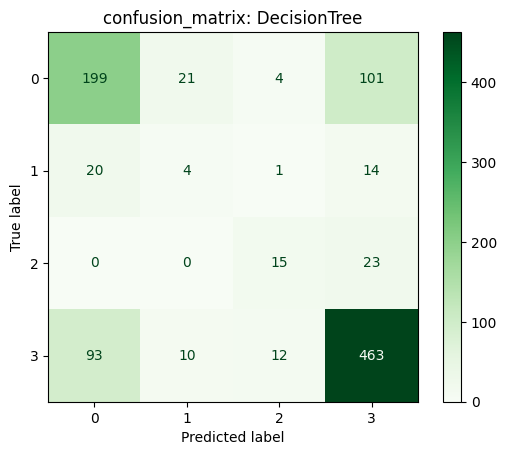

In [93]:
results={}
for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

# Include the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# plot with model name as title
disp.plot(cmap='Greens')
plt.title(f'confusion_matrix: {model_name}')
plt.show()

In [94]:
rf= RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [95]:
param_grid ={
    'n_estimator': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'MinMaxScaler': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=234), param_distributions = param_grid, cv=5, n_jobs= -1, verbose= 1)
random_search.fit(x_train, y_train)
print(f"Best parameters for Random Forest: {random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: Invalid parameter 'n_estimator' for estimator RandomForestClassifier(random_state=234). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, x_scaled, y, cv=5)

print(f'Cross=validation for Random Forest Classifier: {cv_scores}')
print(f'Mean cross validation score: {cv_scores.mean()}')

NameError: name 'random_search' is not defined

In [ ]:
#Evaluate the model using accuracy , precision, Recall , F1-score and a Confusion Matrix
from sklearn.metrics import classification_report

y_pred =model.predict(x_test)
print('Classification Report: ')
print(classification_report(y_test, y_pred, zero_division= 1))

In [ ]:
# import joblib
# joblib.dump(model, 'model.pkl')
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print('Classification Report: ')
print(classification_report(y_test, y_pred, zero_division= 1))
# # save the scalar
# joblib.dump(scaler, 'scaler.pkl')

# print('model and scaler has been successful saved')